import the `tidyverse`

In [18]:
library('tidyverse')
theme_set(theme_gray(base_size = 22))
options(repr.plot.width=8, repr.plot.height=6)

Note that Boxplots was completed last class

# Boxplots

Let's use the otter skull data set again.

In [2]:
# uncomment the following:

# otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
#     gather(characteristic, value, -species, -museum, -accession)

# otter.data %>% head

We'll filter out every row except for those representing the `m1` characgeristic

In [3]:
# uncomment the following:

# df.m1 = otter.data %>% filter(characteristic == 'm1') %>% drop_na()

# df.m1 %>% head

Make a boxplot with `species` on the x-axis and `value` on the y-axis where value represents the `m1` characteristic.

Can you adjust the x-axis text so that it does not overlap? 

*Here's a hint, use this as an argument to `theme`:*
```R
axis.text.x = element_text(angle = 45, hjust = 1)
```

Alternatively, you could "flip" the axis. Use `coord_flip` to put the `species` label on the y-axis.

# Histograms and KDE

Preview the `diamonds` data set:

In [3]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Here is the diamonds set filtered to diamonds with clarity values of `I1` and `IF`.

In [7]:
df = diamonds %>% filter(clarity %in% c('I1', 'IF'))

df %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.32,Premium,E,I1,60.9,58,345,4.38,4.42,2.68
1.17,Very Good,J,I1,60.2,61,2774,6.83,6.90,4.13
1.01,Premium,F,I1,61.8,60,2781,6.39,6.36,3.94
0.52,Ideal,F,IF,62.2,55,2783,5.14,5.18,3.21
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
0.55,Ideal,G,IF,60.9,57,2789,5.28,5.30,3.22


In [15]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

Using `facet_wrap`, plot a histogram of `price` where each plot panel represents one `clarity` value (i.e. `I1` or `IF`). 

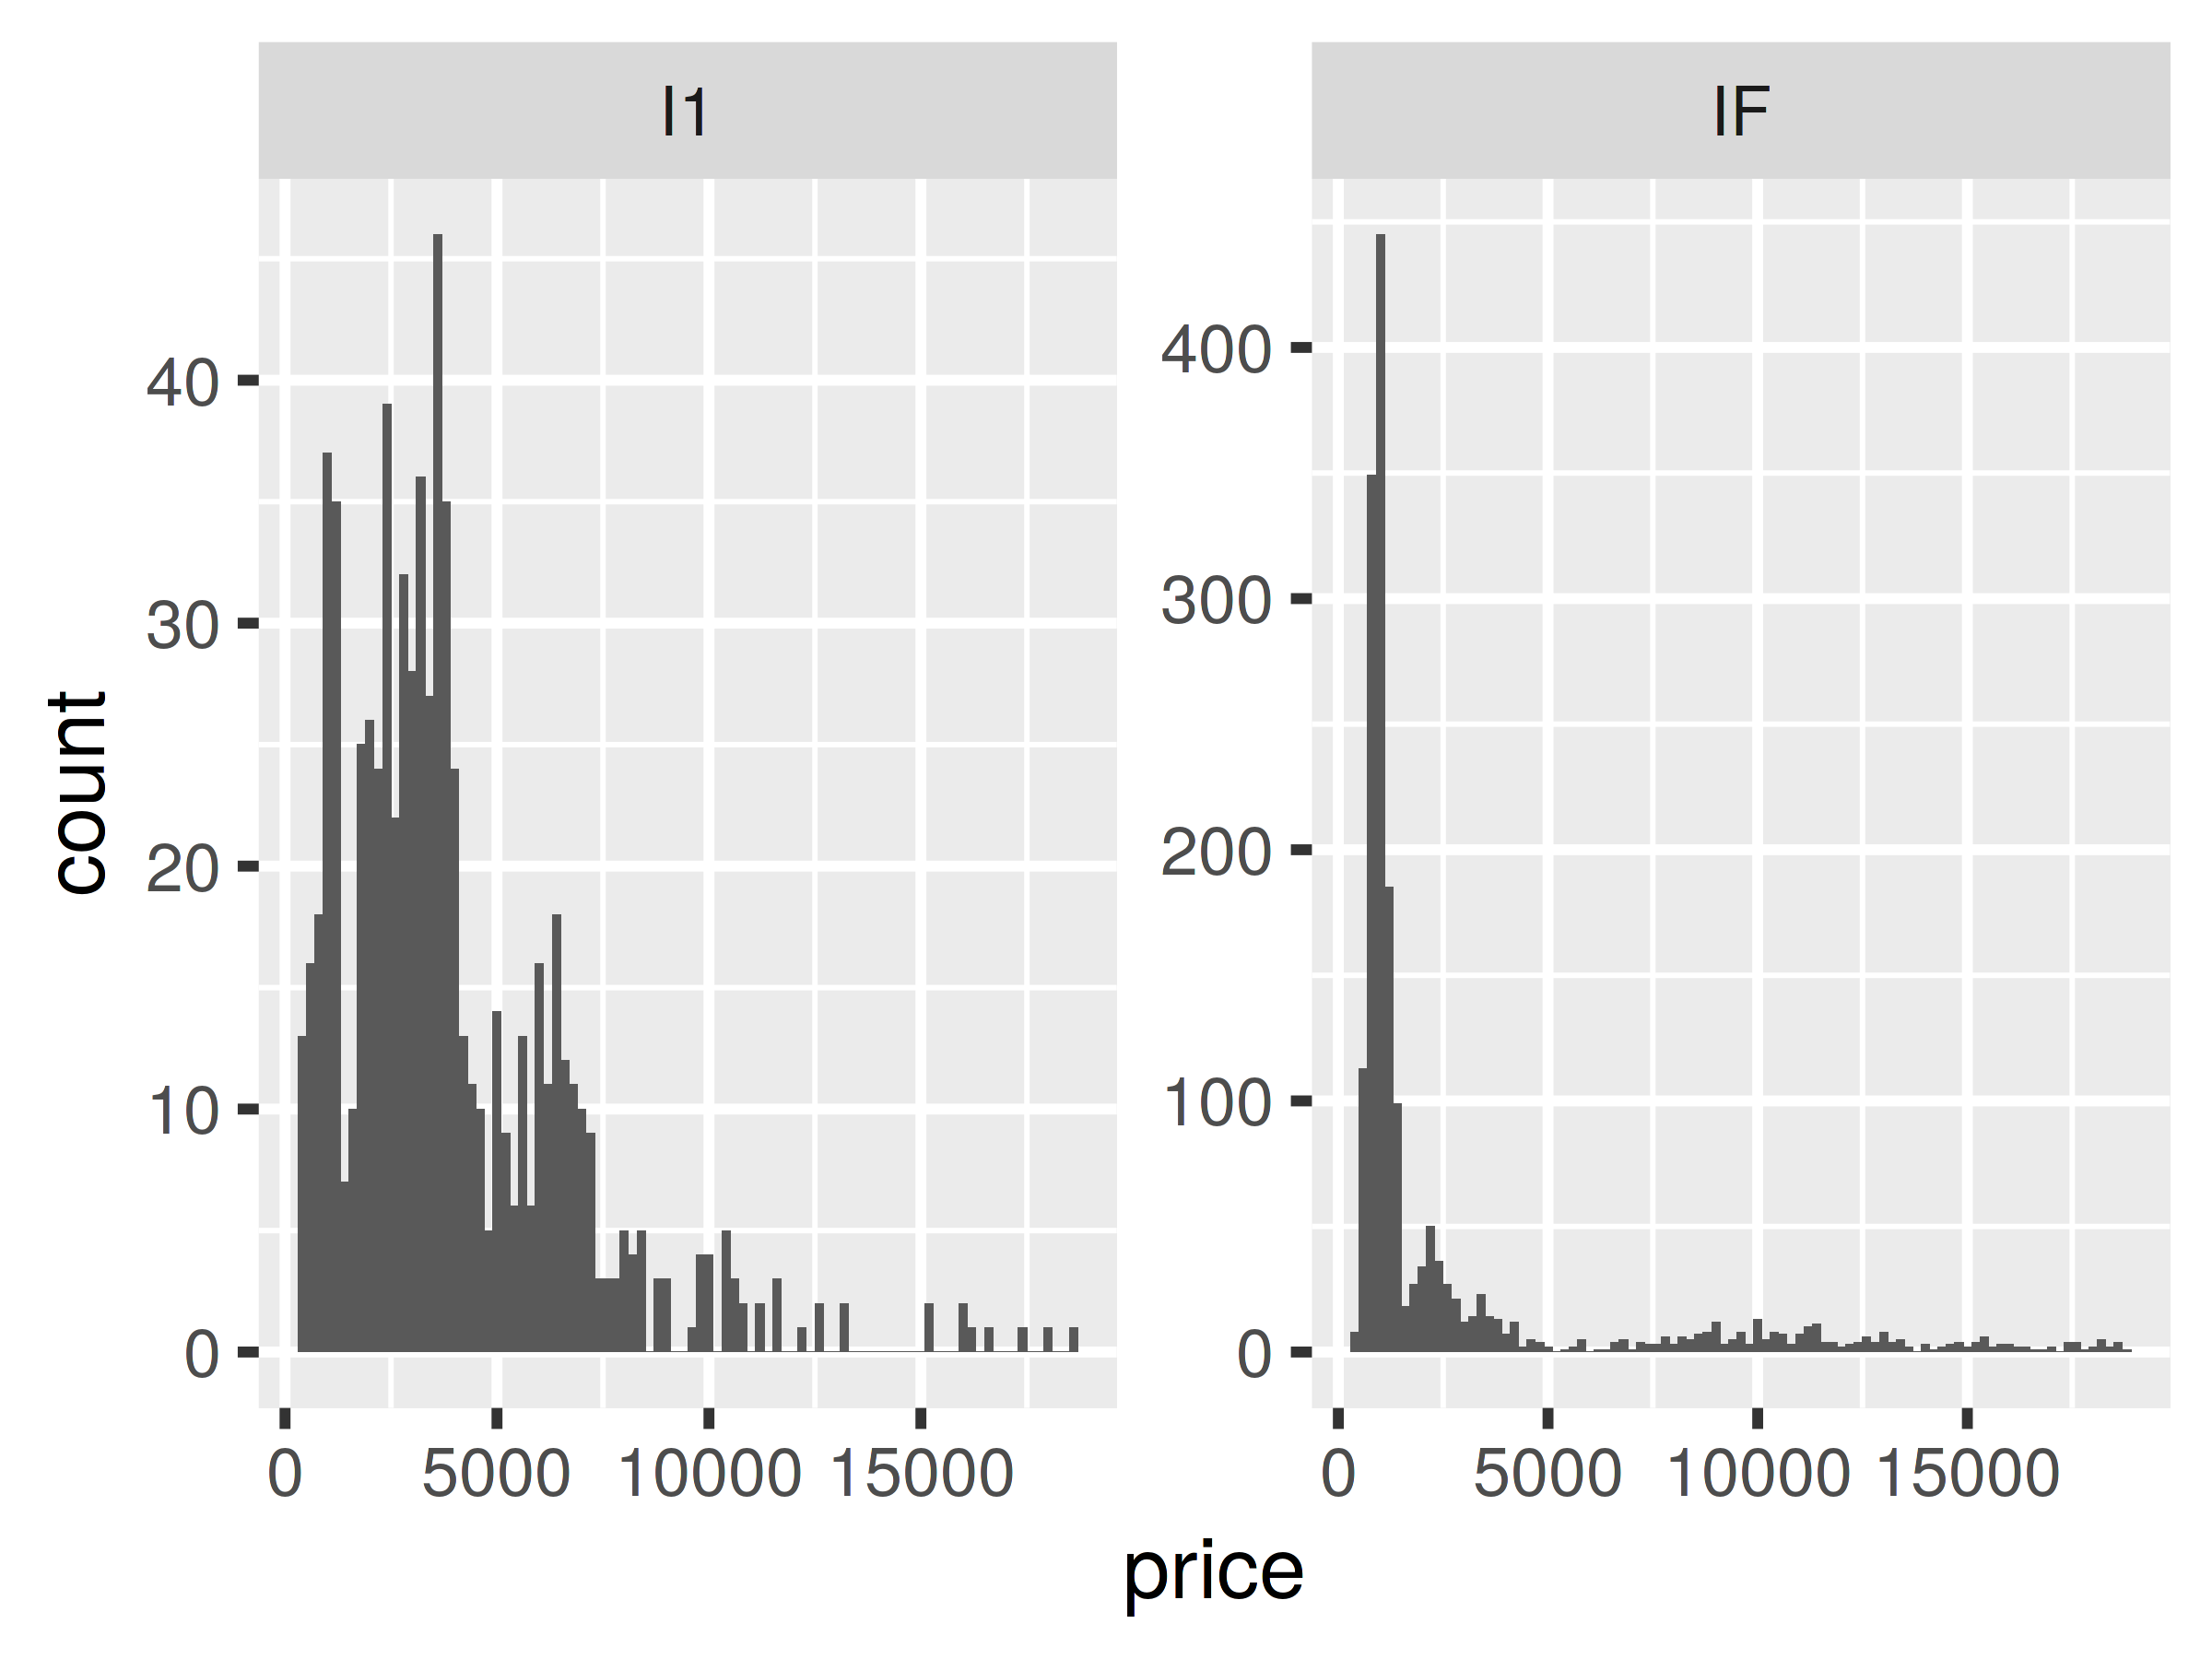

In [28]:
p=ggplot(df, aes(x=price))
p=p+geom_histogram(binwidth=200)
#p=p+facet_wrap(clarity ~ .)
p=p+facet_wrap(~clarity, ncol=2, scales="free") #or "free_y" for just y
p

Do the same with the KDE geom.

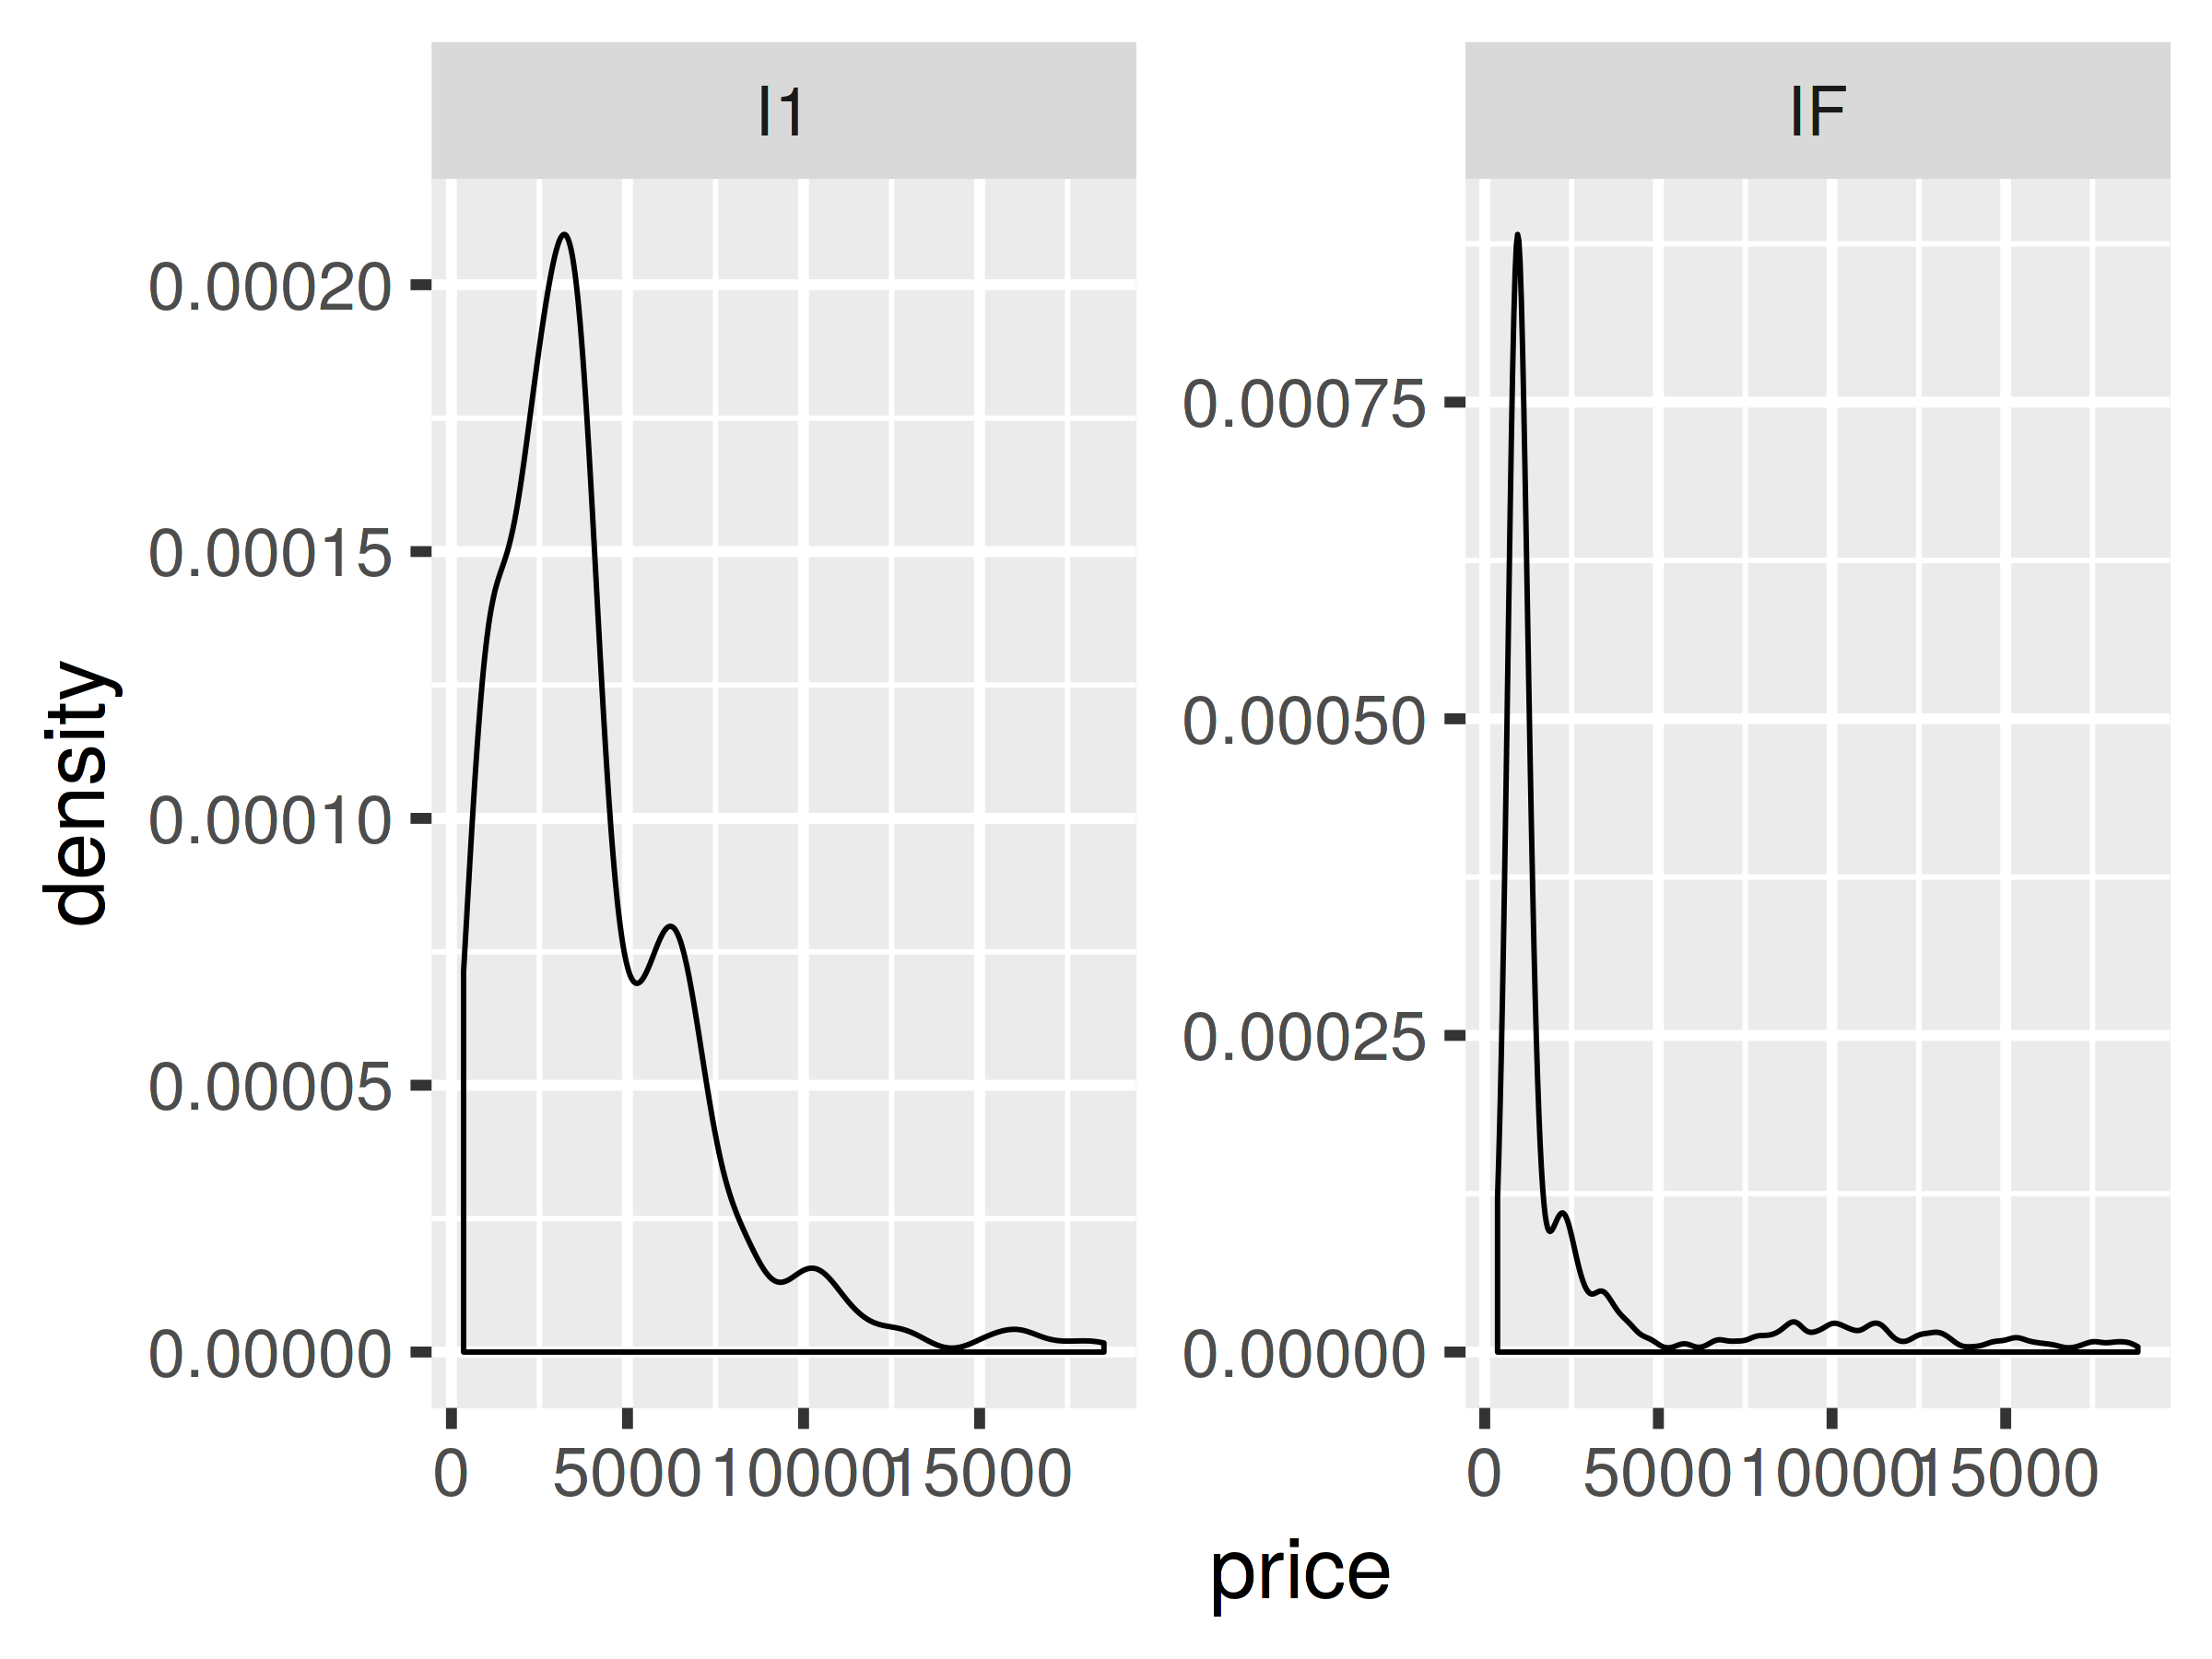

In [29]:
p=ggplot(df, aes(x=price))
p=p+geom_density()
#p=p+facet_wrap(clarity ~.)
p=p+facet_wrap(~clarity, ncol=2, scales="free") #or "free_y" for just y
p

With the KDE geom, plot the two clarity groups on top of each other (*Hint: apply an aesthetic 
mapping of fill to clarity*). Adjust alpha so you can see and compare the distributions.

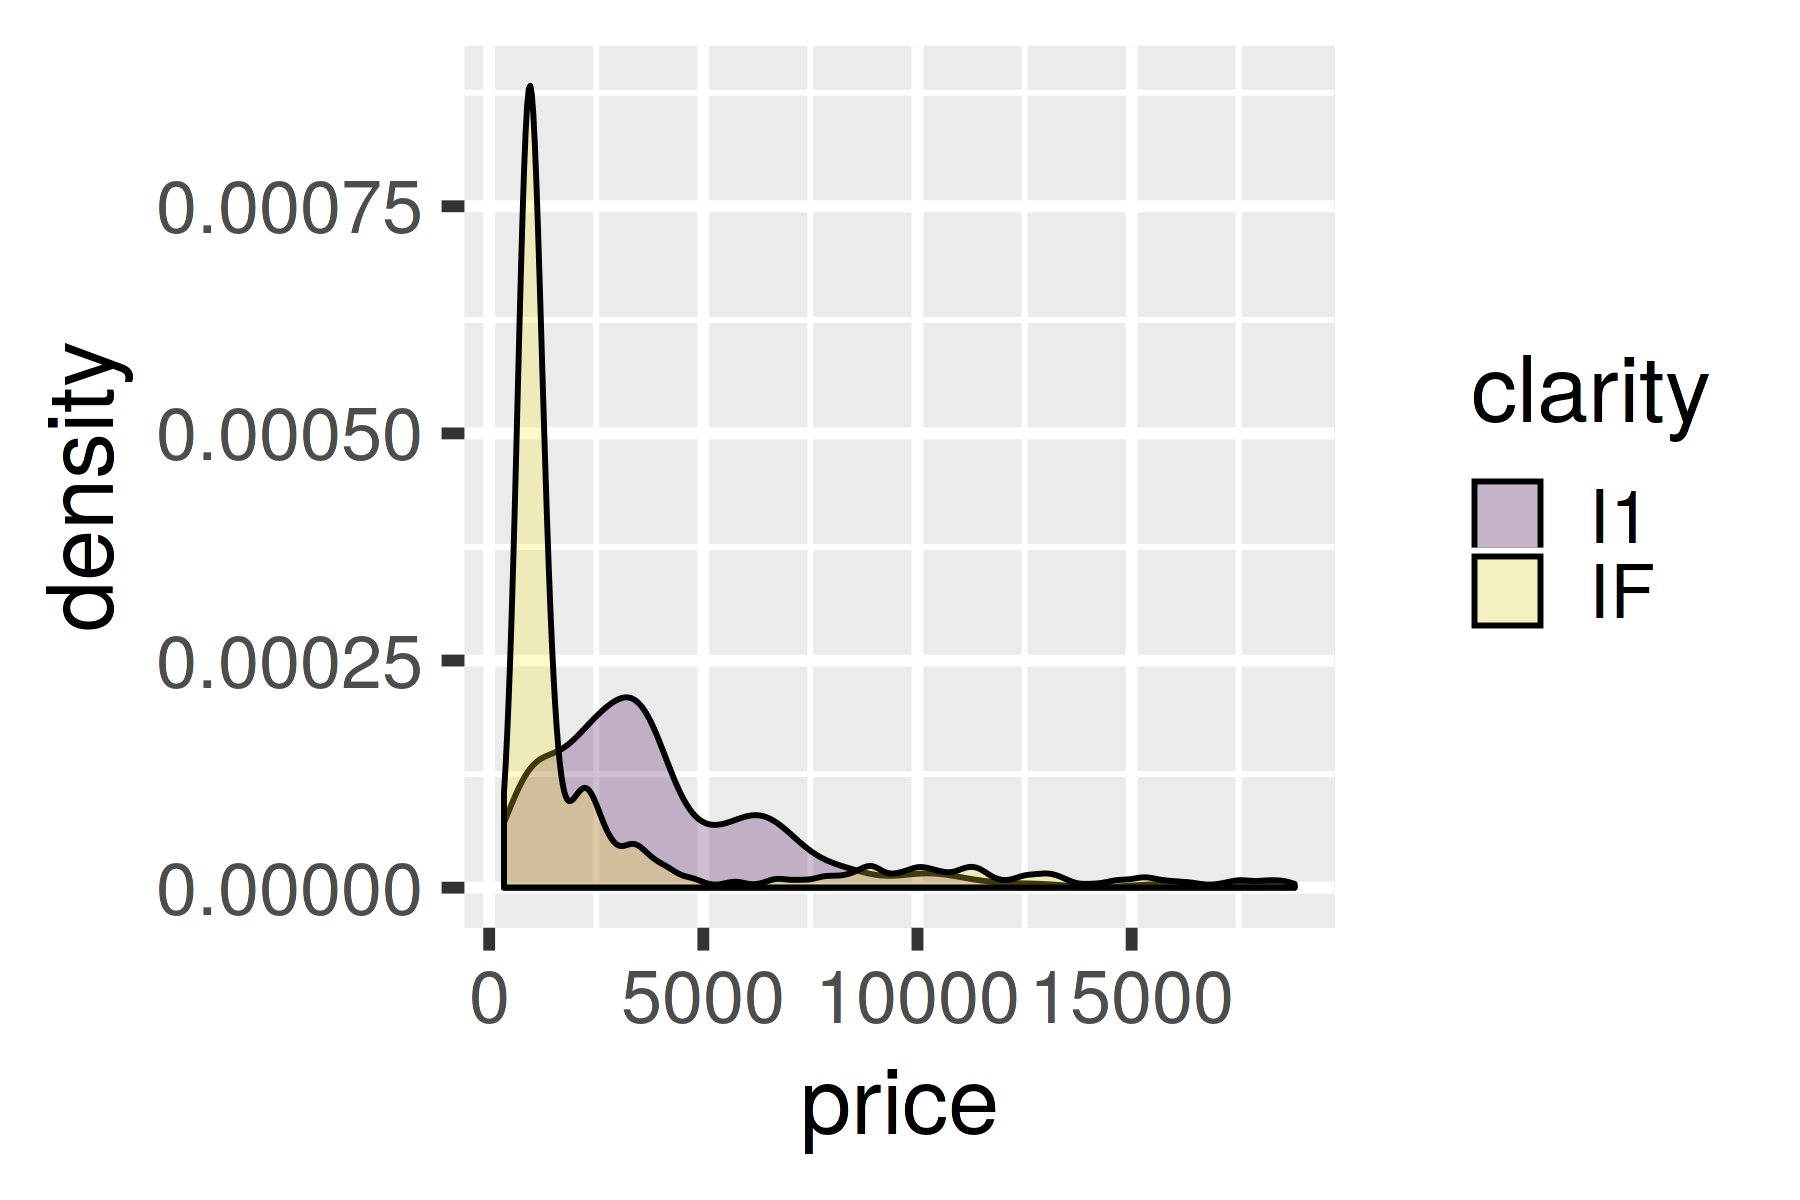

In [32]:
options(repr.plot.width=6, repr.plot.height=4)
p=ggplot(df, aes(x=price, fill=clarity))
p=p+geom_density(alpha=.25)
#p=p+scale_fill_manual(vlaues=c("red","blue"))
p

# Rugs

Plot a histogram of `m1` values for otter skulls. Include a rug.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


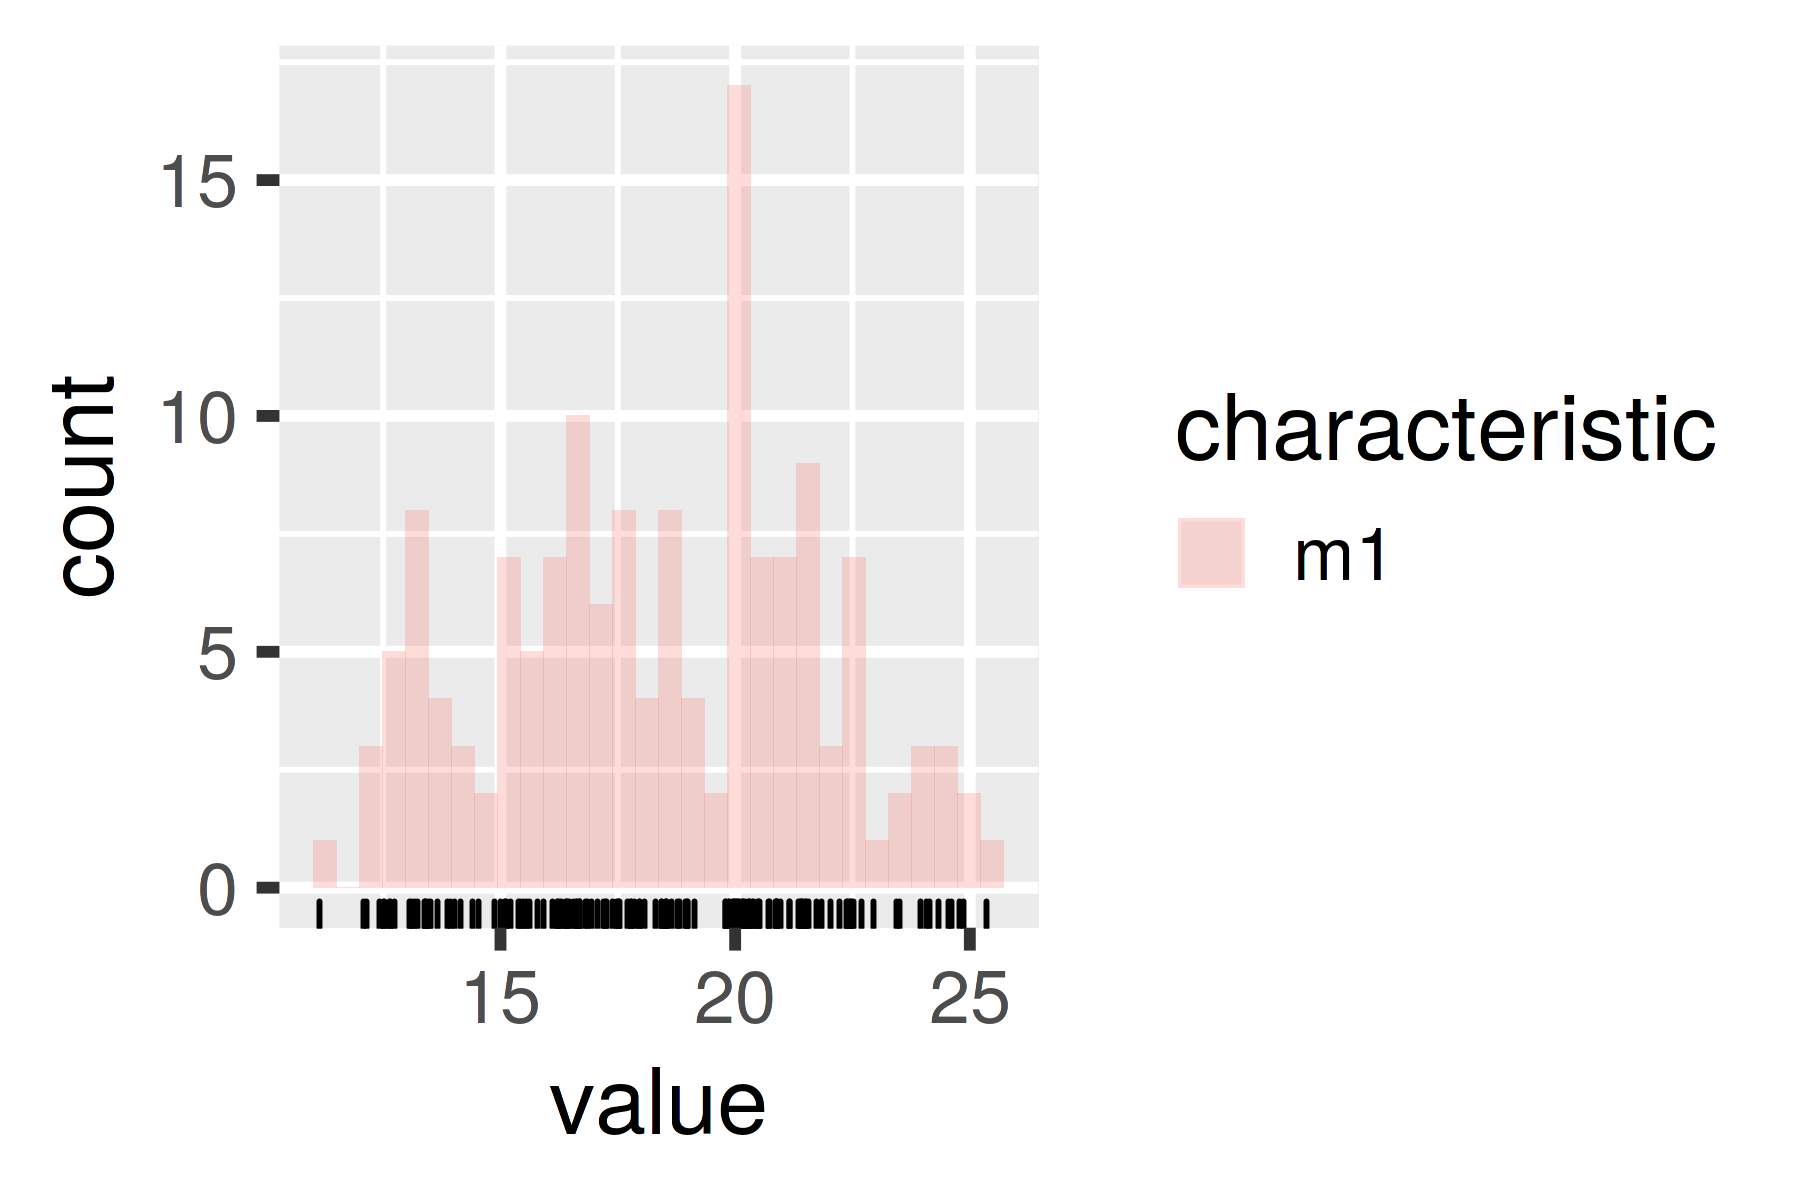

In [46]:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

df = otter.data %>% filter(characteristic %in% c('m1'))
# df.m1 = otter.data %>% filter(characteristic == 'm1') %>% drop_na(), or this.
p=ggplot(df, aes(x=value, fill=characteristic))
p=p+geom_histogram(alpha=.25)
p=p+geom_rug()
p

Can you leave the histogram as is and color the rug ticks by `species`?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


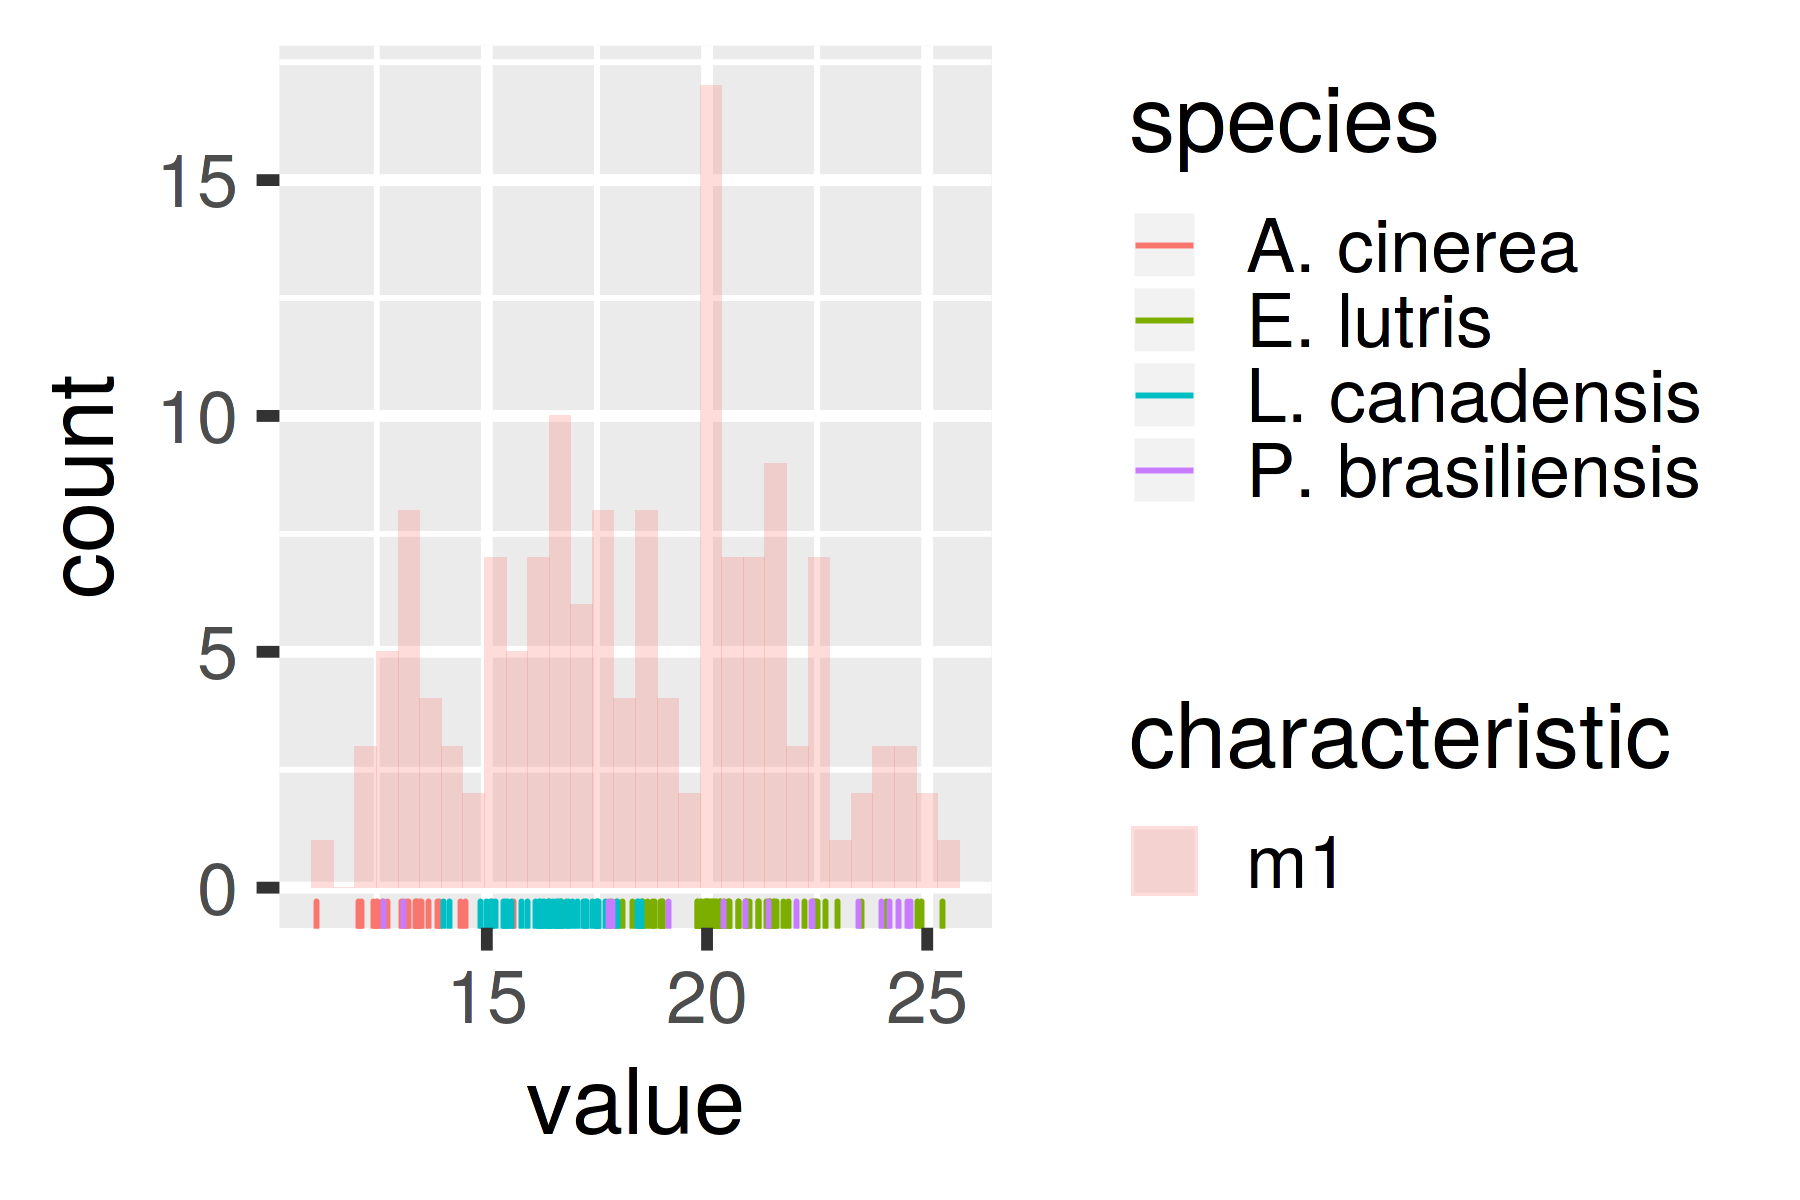

In [48]:
df = otter.data %>% filter(characteristic %in% c('m1'))
p=ggplot(df, aes(x=value, fill=characteristic))
p=p+geom_histogram(alpha=.25)
p=p+geom_rug(aes(color=species))
p